Airlines_data

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings('ignore')

In [261]:
from google.colab import files
upload=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data (3).xlsx


In [262]:
airlines=pd.read_excel('Airlines+Data.xlsx')

EDA

In [263]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [264]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [265]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [266]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [267]:
airlines.isna().sum()

Month         0
Passengers    0
dtype: int64

In [268]:
airlines.duplicated().sum()

0

In [269]:
airlines.value_counts()

Month       Passengers
1995-01-01  112           1
1995-02-01  118           1
2000-11-01  203           1
2000-10-01  229           1
2000-09-01  259           1
                         ..
1997-06-01  178           1
1997-05-01  172           1
1997-04-01  163           1
1997-03-01  178           1
2002-12-01  306           1
Length: 96, dtype: int64

Data Visualization

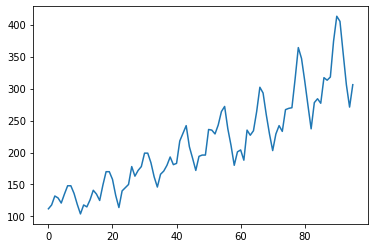

In [270]:
airlines.Passengers.plot()

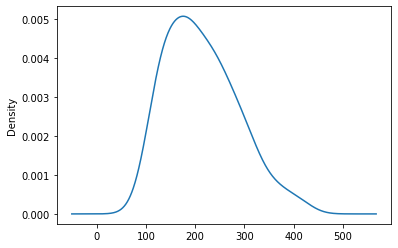

In [271]:
airlines.Passengers.plot(kind='kde')

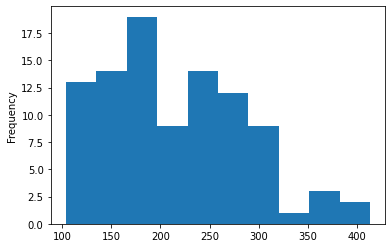

In [272]:
airlines.Passengers.plot(kind='hist')

In [273]:
D=pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True,squeeze=True)

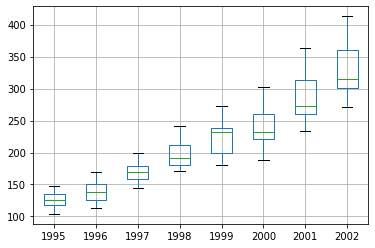

In [274]:
#boxplot
group=D.groupby(pd.Grouper(freq="A"))
years=pd.DataFrame()
for i,j in group:
  years[i.year]=j.values
years.boxplot()
plt.show()

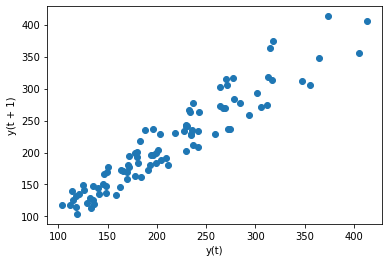

In [275]:
#lagplot
lag_plot(D)

Splitting data

In [276]:
Train = airlines.head(79)
Test = airlines.tail(17)

In [277]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
74,2001-03-01,267
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315


In [278]:
Test

,Month,Passengers
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318


Moving Average

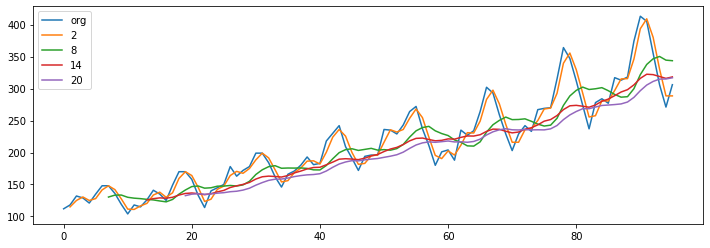

In [279]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time Series Decomposition plot

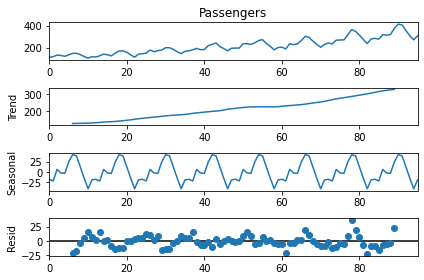

In [280]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

ACF plots AND PACF plots

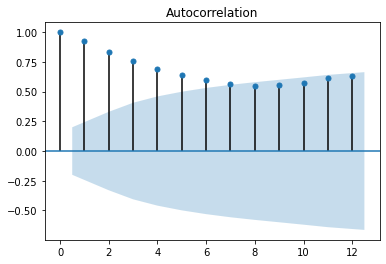

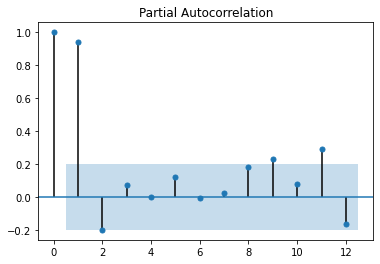

In [281]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

Evaluation Metric RMSE

In [282]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

Model by Simple Exponential Method

In [283]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
r1=RMSE(pred_ses,Test.Passengers) 
r1

56.696157942443044

Model by Holt Method

In [284]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
r2=RMSE(pred_hw,Test.Passengers) 
r2

220.8320586700136

Model by Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [285]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
r3=RMSE(pred_hwe_mul_add,Test.Passengers)
r3

10.03596008905222

Model by Holts winter exponential smoothing with additive seasonality and additive trend

In [286]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
r4=RMSE(pred_hwe_add_add,Test.Passengers)
r4

37.35310424684668

Creating Dataframe for all methods

In [287]:
df={"model":pd.Series(['Simple exponential','Holts model','Holts-mult seas,add trend','Holts-add seas,add trend']),'RMSE':[r1,r2,r3,r4]}

In [335]:
df=pd.DataFrame(df)
df

,model,RMSE
0,Simple exponential,56.696158
1,Holts model,220.832059
2,"Holts-mult seas,add trend",10.035960
3,"Holts-add seas,add trend",37.353104


Final model by combining train and test

In [289]:
hwe_model_mul_add = ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

ForeCasting for next 20 time periods

In [336]:
hwe_model_mul_add.forecast(20)

96     312.899768
97     308.171843
98     355.533483
99     345.770653
100    345.697050
101    392.471899
102    436.502735
103    429.860677
104    380.174322
105    332.318746
106    290.626987
107    330.591994
108    337.372350
109    332.118566
110    382.982730
111    372.295497
112    372.047796
113    422.199226
114    469.357746
115    462.014070
dtype: float64

Conclusion:Therefore,from above models we can conclude that  Holts winter exponential smoothing with multiplicative seasonality and additive trend has lowest RMSE value i.e.,10.03.

So,we can use this model to forecast the airlines passengers.

COCO_COLA DATA

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import lag_plot
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [292]:
from google.colab import files
upload=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata (3).xlsx


In [293]:
coco_cola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

EDA

In [294]:
coco_cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [295]:
coco_cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [296]:
coco_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [297]:
coco_cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [298]:
coco_cola.shape

(42, 2)

In [299]:
coco_cola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [300]:
coco_cola.duplicated().sum()

0

In [301]:
coco_cola.value_counts()

Quarter  Sales      
Q1_86    1734.827000    1
Q3_95    4895.000000    1
Q3_87    2014.362999    1
Q3_88    2128.320000    1
Q3_89    2206.549995    1
Q3_90    2792.753998    1
Q3_91    3172.115997    1
Q3_92    3508.000000    1
Q3_93    3629.000000    1
Q3_94    4461.000000    1
Q4_86    2154.962997    1
Q1_87    1547.818996    1
Q4_87    1991.746998    1
Q4_88    2026.828999    1
Q4_89    2173.967995    1
Q4_90    2556.009995    1
Q4_91    2879.000999    1
Q4_92    3243.859993    1
Q4_93    3373.000000    1
Q4_94    4017.000000    1
Q3_86    2533.804993    1
Q2_96    5253.000000    1
Q2_95    4936.000000    1
Q2_94    4342.000000    1
Q1_88    1869.049999    1
Q1_89    1910.603996    1
Q1_90    2148.278000    1
Q1_91    2480.973999    1
Q1_92    2772.000000    1
Q1_93    3056.000000    1
Q1_94    3352.000000    1
Q1_95    3854.000000    1
Q1_96    4194.000000    1
Q2_86    2244.960999    1
Q2_87    2104.411995    1
Q2_88    2313.631996    1
Q2_89    2331.164993    1
Q2_90    2739.307

Data Visualization

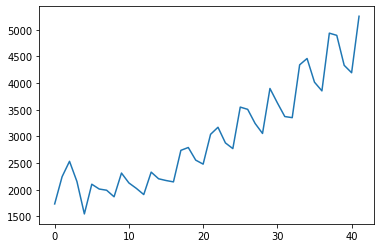

In [302]:
coco_cola.Sales.plot()

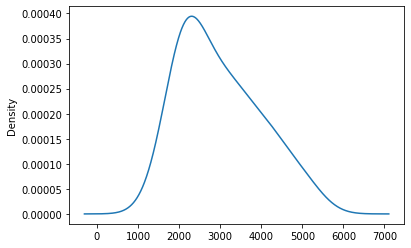

In [303]:
coco_cola.Sales.plot(kind='kde')

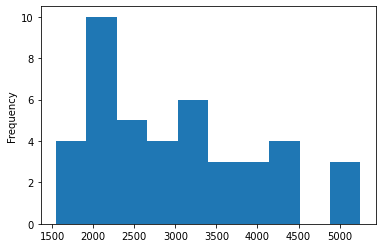

In [304]:
coco_cola.Sales.plot(kind='hist')

In [305]:
D=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True,squeeze=True)

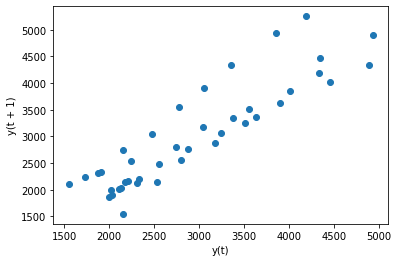

In [306]:
lag_plot(D)

Seperating and Aggregating Quarters and Years from Quarter column

In [307]:
coco_cola[['Quarters','Years']]=coco_cola['Quarter'].str.split('_',n=1,expand=True)

In [308]:
coco_cola

,Quarter,Sales,Quarters,Years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [309]:
quarter_dummies=pd.DataFrame(pd.get_dummies(coco_cola['Quarters']))
quarter_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


Concating the Dummy columns with data

In [310]:
coco_cola=pd.concat([coco_cola,quarter_dummies],axis=1)

In [311]:
coco_cola

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


Creating time column for data

In [312]:
coco_cola['time']=range(1,43)

In [313]:
coco_cola.head()

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,time
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5


Creating Squared time column that used in Quadratic model

In [314]:
coco_cola['time_sqr']=coco_cola['time']*coco_cola['time']

In [315]:
coco_cola.head()

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,time,time_sqr
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25


Creating log Transformation for target variable that used in exponential model



In [316]:
coco_cola['log_sales']=np.log(coco_cola['Sales'])

In [317]:
coco_cola.head()

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


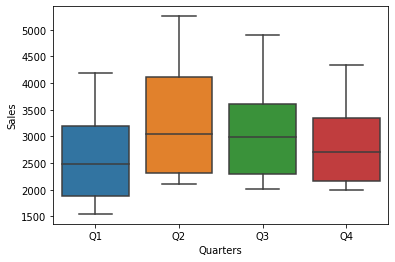

In [318]:
#boxplot
sns.boxplot(x='Quarters',y='Sales',data=coco_cola)

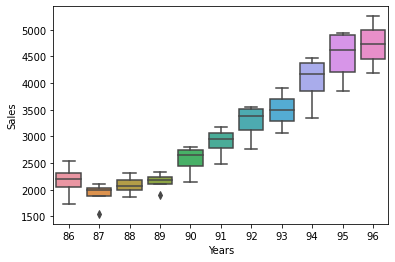

In [319]:
#boxplot
sns.boxplot(x='Years',y='Sales',data=coco_cola)

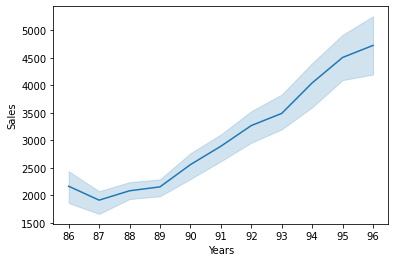

In [320]:
#lineplot
sns.lineplot(x='Years',y='Sales',data=coco_cola)

Splitting the data into train and test

In [321]:
train=coco_cola.head(32)
test=coco_cola.head(10)

In [322]:
train

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [323]:
test

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


Developing various Models

Constructing Linear Model

In [324]:
linear_model = smf.ols('Sales~time',data=coco_cola).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['time'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

413.7583481385076

Developing Exponential Model

In [325]:
Exp = smf.ols('log_sales~time',data=coco_cola).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['time'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

325.23017908283447

Constructing Quadratic Model

In [326]:
#quadratic model
Quad = smf.ols('Sales~time+time_sqr',data=coco_cola).fit()
pred_Quad = pd.Series(Quad.predict(test[["time","time_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

278.0631029342316

Constructing Additive seasonality

In [327]:
#Additive seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=coco_cola).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

961.5600999035835

Constructing Additive Seasonality Quadratic

In [328]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~time+time_sqr+Q1+Q2+Q3+Q4',data=coco_cola).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['time','time_sqr','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

187.91993696227433

Constructing Multiplicative Seasonality

In [329]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = coco_cola).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

824.3994211003863

Constructing Multiplicative Additive Seasonality

In [330]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~time+Q1+Q2+Q3+Q4',data = coco_cola).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

254.32417219624372

DataFrame of all Models

In [331]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,187.919937
6,rmse_Mult_add_sea,254.324172
2,rmse_Quad,278.063103
1,rmse_Exp,325.230179
0,rmse_linear,413.758348
5,rmse_Mult_sea,824.399421
3,rmse_add_sea,961.560100


Predict for New data with additive seasonily quadratic

In [332]:
model_full=smf.ols('log_sales~time+time_sqr+Q1+Q2+Q3+Q4',data = coco_cola).fit()
pred_full=pd.Series(model_full.predict(coco_cola))
pred_final=np.exp(pred_full)

In [333]:
coco_cola["Predicted_sales"]=pred_final

In [334]:
coco_cola

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,time,time_sqr,log_sales,Predicted_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1684.528757
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2113.108342
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2088.150211
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1903.588160
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1762.818162
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,2217.449529
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,2197.336692
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,2008.680014
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,1865.297774
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,2352.866529


Conclusion:Therefore,from above constructed models,it is clear that additive seasonality quadratic model gives lowest RMSE value i.e.,187.91.

So,we use the same model to predict the Cococola Sales of given data.
